In [4]:
# 自动计算cell的计算时间
%load_ext autotime

%config InlineBackend.figure_format='svg' #矢量图设置，让绘图更清晰

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 15.9 ms (started: 2021-08-11 09:26:01 +08:00)


In [3]:
%%bash

# 增加更新
git add *.ipynb

git remote -v

git commit -m '更新 ch1 #2 change Aug 11, 2021'

git push origin master

Process is interrupted.
time: 58.1 s (started: 2021-08-11 09:24:33 +08:00)


In [5]:
#设置使用的gpu
import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")

if gpus:
   
    gpu0 = gpus[0] #如果有多个GPU，仅使用第0个GPU
    tf.config.experimental.set_memory_growth(gpu0, True) #设置GPU显存用量按需使用
    # 或者也可以设置GPU显存为固定使用量(例如：4G)
    #tf.config.experimental.set_virtual_device_configuration(gpu0,
    #    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]) 
    tf.config.set_visible_devices([gpu0],"GPU")

time: 3.93 s (started: 2021-08-11 09:26:03 +08:00)


# 使用 Keras 引入高级深度学习

在第一章中，我们将介绍我们将在整本书中使用的三个深度学习人工神经网络。 这些网络是 MLP、CNN 和 RNN（在第 2 节中定义和描述），它们是本书涵盖的选定高级深度学习主题的构建块，例如自回归网络（自动编码器、GAN 和 VAE）、深度强化学习 ，对象检测和分割，以及使用互信息的无监督学习。

在本章中，我们将一起讨论如何使用 Keras 库实现基于 MLP、CNN 和 RNN 的模型。 更具体地说，我们将使用名为 tf.keras 的 TensorFlow Keras 库。 我们将首先了解为什么 tf.keras 是我们作为工具的绝佳选择。 接下来，我们将深入研究三个深度学习网络中的实现细节。

本章将：
* 确定为什么 tf.keras 库是用于高级深度学习的绝佳选择
* 介绍 MLP、CNN 和 RNN——高级深度学习模型的核心构建块，我们将在本书中使用它们
* 提供如何使用 tf.keras 实现基于 MLP、CNN 和 RNN 的模型的示例
* 沿着这条线，开始介绍重要的深度学习概念，包括优化、正则化和损失函数

在本章结束时，我们将使用 tf.keras 实现基本的深度学习网络。 在下一章中，我们将进入建立在这些基础之上的高级深度学习主题。 让我们通过讨论 Keras 及其作为深度学习库的功能开始本章。

## 为什么 Keras 是完美的深度学习库？

Keras 是一个流行的深度学习库，在撰写本文时有超过 370,000 名开发人员在使用它——这个数字每年增加约 35%。 超过 800 名贡献者积极维护它。 我们将在本书中使用的一些示例已贡献给官方 Keras GitHub 存储库。

谷歌的 TensorFlow 是一个流行的开源深度学习库，它使用 Keras 作为其库的高级 API。 它通常被称为 tf.keras。 在本书中，我们将交替使用 Keras 和 tf.keras 这两个词。

tf.keras 是深度学习库的流行选择，因为它高度集成到 TensorFlow 中，TensorFlow 在生产部署中以其可靠性而闻名。 TensorFlow 还提供了各种用于生产部署和维护、调试和可视化以及在嵌入式设备和浏览器上运行模型的工具。 在科技行业，谷歌、Netflix、优步和英伟达都在使用 Keras。

我们选择 tf.keras 作为我们在本书中使用的首选工具，因为它是一个致力于加速深度学习模型实现的库。 这使得 Keras 非常适合我们想要实用和动手的情况，例如当我们探索本书中的高级深度学习概念时。 因为 Keras 旨在加速深度学习模型的开发、训练和验证，所以在有人可以最大限度地使用库之前，必须学习该领域的关键概念。

> 本书中的所有示例都可以在 GitHub 上的以下链接中找到：https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras。

在 tf.keras 库中，层像乐高积木一样相互连接，从而产生一个干净且易于理解的模型。 模型训练很简单，只需要数据、多个训练时期和要监控的指标。

最终结果是，与 PyTorch 等其他深度学习库相比，大多数深度学习模型的实现代码行数要少得多。 通过使用 Keras，我们将通过节省代码实现时间来提高生产力，而这些时间可以用于更关键的任务，例如制定更好的深度学习算法。

同样，Keras 是快速实现深度学习模型的理想选择，就像我们将在本书中使用的模型一样。 使用 Sequential 模型 API，只需几行代码即可构建典型模型。 但是，不要被它的简单性所误导。

Keras 还可以使用其功能 API 以及用于动态图的模型和层类构建更高级和复杂的模型，这些模型可以进行定制以满足独特的需求。 函数式 API 支持构建图样模型、层重用以及创建行为类似于 Python 函数的模型。 同时，Model 和 Layer 类为实现不常见或实验性的深度学习模型和层提供了框架。

### 安装 Keras 和 TensorFlow

Keras 不是一个独立的深度学习库。 如图 1.1.1 所示，它建立在另一个深度学习库或后端之上。 这可能是 Google 的 TensorFlow、MILA 的 Theano、微软的 CNTK 或 Apache MXNet。 然而，与本书的前一版不同，我们将使用由 TensorFlow 2.0（tf2 或简称为 tf）提供的 Keras，即 tf.keras，以利用 tf2 提供的有用工具。 tf.keras 也被认为是 TensorFlow 的事实上的前端，它在生产环境中展示了其经过验证的可靠性。 此外，Keras 对 TensorFlow 以外的后端的支持在不久的将来将不再可用。

从 Keras 迁移到 tf.keras 通常与更改一样简单：
```
from keras... import ...
```
到
```
from tensorflow.keras... import ...
```
本书中的代码示例均使用 Python 3 编写，以支持 Python 2到 2020 年结束。

在硬件上，Keras 在 CPU、GPU 和 Google 的 TPU 上运行。 在本书中，我们将在 CPU 和 NVIDIA GPU（特别是 GTX 1060、GTX 1080Ti、RTX 2080Ti、V100 和 Quadro RTX 8000 型号）上进行测试：

![](https://tva1.sinaimg.cn/large/008i3skNly1gtb3uk02tpj31f40j675z.jpg)

在继续本书的其余部分之前，我们需要确保 tf2 已正确安装。 有多种安装方式； 一个例子是使用 pip3 安装 tf2：

本书不包括完整的 Keras API。 我们将只涵盖解释本书中选定的高级深度学习主题所需的材料。 更多信息，我们可以查阅官方 Keras 文档，可以在 https://keras.io 或 https://www.tensorflow.org/guide/keras/overview 找到。

在接下来的部分中，将讨论 MLP、CNN 和 RNN 的细节。 这些网络将用于使用 tf.keras 构建一个简单的分类器。

## MLP, CNN和 RNN

我们已经提到我们将使用三个深度学习网络，它们是：
* MLP：多层感知器
* CNN：卷积神经网络
* RNN：循环神经网络

这是我们将在本书中使用的三个网络。 稍后，您会发现它们经常组合在一起以利用每个网络的优势。

在本章中，我们将更详细地讨论这些构建块。 在以下部分中，MLP 与其他重要主题（例如损失函数、优化器和正则化器）一起讨论。 在此之后，我们将涵盖 CNN 和 RNN。

### MLP、CNN、RNN的区别

MLP 是一个全连接 (FC) 网络。 在某些文献中，您经常会发现它被称为深度前馈网络或前馈神经网络。 在本书中，我们将使用术语 MLP。 从已知目标应用程序的角度理解这个网络将有助于我们深入了解设计高级深度学习模型的根本原因。

MLP 在简单的逻辑和线性回归问题中很常见。 然而，MLP 并不是处理顺序和多维数据模式的最佳选择。 按照设计，MLP 很难记住顺序数据中的模式，并且需要大量参数来处理多维数据。

对于顺序数据输入，RNN 很受欢迎，因为其内部设计允许网络发现数据历史中的依赖关系，这对预测很有用。 对于图像和视频等多维数据，CNN 擅长提取用于分类、分割、生成和其他下游任务的特征图。 在某些情况下，一维卷积形式的 CNN 也用于具有顺序输入数据的网络。 然而，在大多数深度学习模型中，MLP 和 CNN 或 RNN 相结合，以充分利用每个网络。

MLP、CNN 和 RNN 并没有完成深度网络的全貌。 需要确定目标或损失函数、优化器和正则化器。 目标是在训练期间减少损失函数值，因为这种减少是模型正在学习的一个很好的指标。

为了最小化这个值，模型使用了一个优化器。 这是一种确定在每个训练步骤中应如何调整权重和偏差的算法。 经过训练的模型不仅必须适用于训练数据，还必须适用于训练环境之外的数据。 正则化器的作用是确保训练后的模型泛化到新数据。

现在，让我们进入三个网络——我们将从讨论 MLP 网络开始。

## 多层感知器 (MLP)

我们将要研究的三个网络中的第一个是 MLP 网络。 假设目标是创建一个神经网络，用于根据手写数字识别数字。 例如，当网络的输入是手写数字 8 的图像时，相应的预测也必须是数字 8。这是分类器网络的经典工作，可以使用逻辑回归进行训练。 为了训练和验证分类器网络，必须有足够大的手写数字数据集。 修改后的美国国家标准与技术研究院数据集，简称 MNIST，通常被认为是 Hello World！ 深度学习数据集。 它是一个适合手写数字分类的数据集。

在我们讨论 MLP 分类器模型之前，我们必须了解 MNIST 数据集。 本书中的大量示例使用了 MNIST 数据集。 MNIST 用于解释和验证许多深度学习理论，因为它包含的 70,000 个样本很小，但信息却足够丰富：

![](https://tva1.sinaimg.cn/large/008i3skNgy1gtb44zs672j31ba0kw0uv.jpg)

在下一节中，我们将简要介绍 MNIST。

### MNIST 数据集

MNIST 是一个范围从 0 到 9 的手写数字的集合。它有一个包含 60,000 张图像的训练集和 10,000 张分类到相应类别或标签的测试图像。 在某些文献中，术语目标或基本事实也用于指代标签。

在上图中，可以看到 MNIST 数字的示例图像，每个图像的大小为 28 x 28 像素，灰度级。 为了在 Keras 中使用 MNIST 数据集，提供了一个 API 来自动下载和提取图像和标签。 代码清单 1.3.1 演示了如何在一行中加载 MNIST 数据集，允许我们计算训练和测试标签，然后绘制 25 个随机数字图像。

> 清单 1.3.1：mnist-sampler-1.3.1.py

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


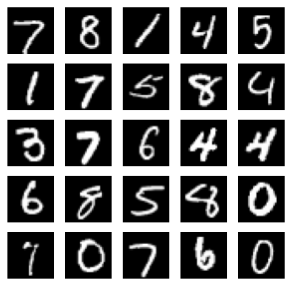

time: 1.3 s (started: 2021-08-10 22:05:26 +08:00)


In [4]:
'''
Demonstrates how to sample and plot MNIST digits
using Keras API
https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras
'''

import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.savefig("mnist-samples.png")
plt.show()
plt.close('all')

In [11]:
indexes

array([57644, 57266, 46377, 28391, 25006, 23649,  5421, 41707, 25137,
       18805, 57306, 24848,   442, 35879, 59599, 15041, 34437, 47110,
       38454, 13515, 27083, 38081,  1463,  2998, 35876])

mnist.load_data() 方法很方便，因为不需要单独加载所有 70,000 个图像和标签并将它们存储在数组中。

在讨论 MLP 分类器模型之前，必须记住，虽然 MNIST 数据由二维张量组成，但应根据输入层的类型对其进行重塑。 下图 1.3.2 显示了如何为 MLP、CNN 和 RNN 输入层重塑 3 × 3 灰度图像：

![](https://tva1.sinaimg.cn/large/008i3skNgy1gtb4fa9g4vj31b00nugnt.jpg)

在以下部分中，将介绍 MNIST 的 MLP 分类器模型。 我们将演示如何使用 tf.keras 高效地构建、训练和验证模型。

### MNIST 数字分类器模型

图 1.3.3 所示的拟议 MLP 模型可用于 MNIST 数字分类。 当暴露单元或感知器时，MLP 模型是一个全连接网络，如图 1.3.4 所示。 我们还将展示感知器的输出如何根据输入计算为第 n 个单元的权重 wi 和偏差 bn 的函数。 相应的 tf.keras 实现如清单 1.3.2 所示：

![](https://tva1.sinaimg.cn/large/008i3skNgy1gtb4h31x9cj31c00gaabp.jpg)

![](https://tva1.sinaimg.cn/large/008i3skNgy1gtb4hl26w8j310k0tctbg.jpg)

> 清单 1.3.2：mlp-mnist-1.3.2.py

In [7]:
'''
A MLP network for MNIST digits classification

98.3% test accuracy in 20epochs

https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras
'''

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [15]:
#
# enable this if pydot can be installed
# pip install pydot
#plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

In [ ]:
采用混合精度：

In [16]:
'''
A MLP network for MNIST digits classification

98.3% test accuracy in 20epochs

https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras
'''

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

from tensorflow import keras
keras.mixed_precision.set_global_policy("mixed_float16")

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
#
# enable this if pydot can be installed
# pip install pydot
#plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPUs will likely run quickly with dtype policy mixed_float16 as they all have compute capability of at least 7.0
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
______________________________________________________________

> 似乎用了混合精度后，反而变慢了！

In [ ]:
直接用1,2等作为label:

In [21]:
'''
A MLP network for MNIST digits classification

98.3% test accuracy in 20epochs

https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras
'''

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
#
# enable this if pydot can be installed
# pip install pydot
#plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=30, batch_size=batch_size)

# validate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_16 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

在讨论模型实现之前，数据必须采用正确的形状和格式。 加载 MNIST 数据集后，标签数量计算如下：

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))

硬编码 num_labels = 10 也是一种选择。 但是，让计算机完成它的工作总是一个好习惯。 代码假设 y_train 的标签为 0 到 9。

此时，标签是数字格式，即从 0 到 9。标签的这种稀疏标量表示不适用于输出每个类的概率的神经网络预测层。 更合适的格式称为 one-hot 向量，一个 10 维向量，除数字类的索引外，所有元素均为 0。 例如，如果标签为 2，则等效的 one-hot 向量为 [0,0,1,0,0,0,0,0,0,0]。 第一个标签的索引为 0。

以下几行将每个标签转换为一个独热向量：

In [ ]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

在深度学习中，数据存储在张量中。 术语张量适用于标量（0D 张量）、向量（1D 张量）、矩阵（二维张量）和多维张量。

从这一点来看，除非标量、向量或矩阵使解释更清晰，否则使用术语张量。

如下所示的其余代码计算图像尺寸、第一个密集层的 input_size 值，并将每个像素值从 0 到 255 缩放到从 0.0 到 1.0 的范围。 虽然可以直接使用原始像素值，但最好对输入数据进行归一化，以避免可能导致训练困难的大梯度值。 网络的输出也被归一化。 训练后，可以选择通过将输出张量乘以 255 将所有内容恢复为整数像素值。

所提出的模型基于 MLP 层。 因此，输入预计为一维张量。 因此，x_train 和 x_test 分别被重塑为 [60,000, 28 * 28] 和 [10,000, 28 * 28]。 在 NumPy 中，大小为 -1 意味着让库计算正确的维度。 对于 x_train，这是 60,000。

In [ ]:
# image dimensions (assumed square) 400
image_size = x_train.shape[1]
input_size = image_size * image_size
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

准备好数据集后，下面重点介绍使用 Keras 的 Sequential API 构建 MLP 分类器模型。

### 使用 MLP 和 Keras 构建模型

由三个 MLP 层组成。 在 Keras 中，MLP 层被称为密集层，它代表密集连接层。 第一层和第二层 MLP 层本质上是相同的，每个层都有 256 个单元，然后是整流线性单元 (ReLU) 激活和删除。 选择了 256 个单元，因为 128、512 和 1,024 个单元的性能指标较低。 在 128 个单元时，网络收敛速度很快，但测试精度较低。 512 或 1,024 的额外单元数不会显着提高测试精度。

单位数是一个超参数。 它控制网络的容量。 容量是网络可以近似的函数复杂度的度量。 例如，对于多项式，度数就是超参数。 随着度数的增加，函数的容量也会增加。

Keras 的顺序 API。 如果模型需要由一系列层处理的一个输入和一个输出，这就足够了。 为简单起见，我们暂时使用它； 然而，在第 2 章“深度神经网络”中，将引入 Keras 的功能 API 来实现需要更复杂结构（例如多输入和多输出）的高级深度学习模型。

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector model.
model.add(Activation('softmax'))

NameError: name 'hidden_units' is not defined

time: 1.33 s (started: 2021-08-10 22:15:47 +08:00)


In [9]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

由于 Dense 层是线性运算，因此 Dense 层序列只能近似线性函数。 问题在于 MNIST 数字分类本质上是一个非线性过程。 在 Dense 层之间插入 relu 激活将使 MLP 网络能够对非线性映射进行建模。 relu 或 ReLU 是一个简单的非线性函数。 它非常像一个过滤器，它允许正输入不变地通过，同时将其他一切都钳位为零。 在数学上，relu 用以下等式表示，并绘制在图 1.3.5 中：

![](https://tva1.sinaimg.cn/large/008i3skNgy1gtbok4c0goj312y0osmyq.jpg)

还有其他非线性函数可以使用，例如 elu、selu、softplus、sigmoid 和 tanh。 然而，relu 是最常用的函数，并且由于其简单性而具有计算效率。 sigmoid 和 tanh 函数用作输出层中的激活函数，将在后面介绍。 表 1.3.1 显示了每个激活函数的方程：

![](https://tva1.sinaimg.cn/large/008i3skNgy1gtboxl2sn1j318y0rsadh.jpg)

尽管我们已经完成了 MLP 分类器模型的关键层，但我们还没有解决泛化或模型在训练数据集之外执行的能力的问题。 为了解决这个问题，我们将在下一节介绍正则化。

### 正则化

神经网络倾向于记住其训练数据，尤其是当它包含足够多的容量时。 在这种情况下，网络在接受测试数据时会发生灾难性的故障。 这是网络无法泛化的经典案例。 为了避免这种趋势，模型使用了正则化层或函数。 常见的正则化层是 Dropout。

Dropout的想法很简单。 给定一个 dropout 率（这里，它被设置为 dropout = 0.45），Dropout 层会随机删除参与下一层的那部分单元。 例如，如果第一层有 256 个单位，应用 dropout = 0.45 后，只有 (1 - 0.45) * 256 个单位 = 来自第 1 层的 140 个单位参与第 2 层。

Dropout 层使神经网络对不可预见的输入数据具有鲁棒性，因为网络经过训练可以正确预测，即使缺少某些单元也是如此。 值得注意的是，输出层中没有使用 dropout，它仅在训练期间处于活动状态。 此外，在预测过程中不存在 dropout。

除了诸如 l1 或 l2 之类的 dropout 之外，还可以使用正则化器。 在 Keras 中，可以对每层的偏差、权重和激活输出进行正则化。 l1 和 l2 通过添加惩罚函数来支持较小的参数值。 l1 和 l2 都使用参数值的绝对值 (l1) 或平方 (l2) 的总和的一部分来强制执行惩罚。 换句话说，惩罚函数迫使优化器找到较小的参数值。 具有小参数值的神经网络对输入数据中噪声的存在更不敏感。

例如，分数=0.001 的 l2 权重正则化器可以实现为：

In [ ]:
from tensorflow.keras.regularizers import l2

model.add(Dense(hidden_units,
    kernel_regularizer=l2(0.001),
    input_dim=input_size))

如果使用 l1 或 l2 正则化，则不会添加额外的层。 正则化是在 Dense 层内部进行的。 对于所提出的模型，dropout 仍然具有比 l2 更好的性能。

我们几乎完成了我们的模型。 下一节重点介绍输出层和损失函数。

### 输出激活和损失函数

输出层有 10 个单元，后跟一个 softmax 激活层。 10 个单位对应 10 个可能的标签、类别或类别。 softmax 激活可以用数学表示，如下面的等式所示：

![](https://tva1.sinaimg.cn/large/008i3skNgy1gtbs76ve6aj318k04edfx.jpg)

该方程适用于所有 N = 10 个输出，xi 表示 i = 0，1 … 9 表示最终预测。 softmax 的想法非常简单。 它通过规范化预测将输出压缩为概率。 这里，每个预测输出是索引是给定输入图像的正确标签的概率。 所有输出的所有概率之和为 1.0。 例如，当 softmax 层生成预测时，它将是一个 10 维的一维张量，可能类似于以下输出：

![](https://tva1.sinaimg.cn/large/008i3skNgy1gtbs9o88zbj316406oq3r.jpg)

预测输出张量表明输入图像将是 7，因为它的索引具有最高的概率。 numpy.argmax() 方法可用于确定具有最高值的元素的索引。

输出激活层还有其他选择，例如线性、sigmoid 或 tanh。 线性激活是一个恒等函数。 它将其输入复制到其输出。 sigmoid 函数更具体地称为逻辑 sigmoid。 如果预测张量的元素将在 0.0 和 1.0 之间独立映射，则将使用此选项。 与 softmax 不同，预测张量的所有元素的总和不限于 1.0。 例如，sigmoid 用作情感预测（从 0.0 到 1.0，0.0 为坏，1.0 为好）或图像生成（0.0 映射到像素级别 0，1.0 映射到像素 255）的最后一层。

tanh 函数将其输入映射到 -1.0 到 1.0 的范围内。 如果输出可以在正值和负值之间摆动，这一点很重要。 tanh 函数更广泛地用于循环神经网络的内部层，但也被用作输出层激活。 如果在输出激活中使用 tanh 替换 sigmoid，则必须适当缩放所使用的数据。 例如，不是使用$x = \frac{x}{255}$在 [0.0 1.0] 范围内缩放每个灰度像素，而是使用在[-1.0 1.0] 范围内使用$x = \frac{x-17.5}{127.5}$ 。

图 1.3.6 中的下图显示了 sigmoid 和 tanh 函数。 在数学上，sigmoid 可以表示为以下等式：

![](https://tva1.sinaimg.cn/large/008i3skNgy1gtbsfn66erj318c03g3yl.jpg)

![](https://tva1.sinaimg.cn/large/008i3skNgy1gtbsg20h6ej30ym0mm0u7.jpg)

预测的张量与 one-hot ground truth 向量的距离称为损失。 一种类型的损失函数是 mean_squared_error (MSE)，或目标或标签与预测之间差异的平方的平均值。 在当前示例中，我们使用的是 categorical_crossentropy。 它是目标或标签的乘积与每个类别的预测的对数之和的负数。 Keras 中还有其他可用的损失函数，例如 mean_ absolute_error 和 binary_crossentropy。 表 1.3.2 总结了常见的损失函数。

![](https://tva1.sinaimg.cn/large/008i3skNgy1gtbsh8chypj30tw0ri40b.jpg)

模型正在学习。 对于按类别分类，在 softmax 激活层之后，categorical_crossentropy 或 mean_squared_error 都是不错的选择。 binary_crossentropy 损失函数通常在 sigmoid 激活层之后使用，而 mean_squared_error 是 tanh 输出的一个选项。 在下一节中，我们将讨论优化算法以最小化我们在这里讨论的损失函数。

### 优化

通过优化，目标是最小化损失函数。 这个想法是，如果损失减少到可接受的水平，模型已经间接学习了将输入映射到输出的函数。 性能指标用于确定模型是否已了解基础数据分布。 Keras 中的默认指标是损失。 在训练、验证和测试期间，还可以包括其他指标，例如准确性。 准确度是基于真实情况的正确预测的百分比或分数。 在深度学习中，还有许多其他性能指标。 但是，这取决于模型的目标应用程序。 在文献中，报告了在测试数据集上训练模型的性能指标，以与其他深度学习模型进行比较。

在 Keras 中，优化器有多种选择。 最常用的优化器是随机梯度下降 (SGD)、自适应矩 (Adam) 和均方根传播 (RMSprop)。 每个优化器都具有可调参数，如学习率、动量和衰减。 Adam 和 RMSprop 是具有自适应学习率的 SGD 变体。 在提议的分类器网络中，使用了 Adam，因为它具有最高的测试准确率。

SGD 被认为是最基本的优化器。 它是微积分中梯度下降的更简单版本。 在梯度下降 (GD) 中，跟踪函数曲线下坡会找到最小值，就像在山谷中下坡直到到达底部一样。

学习率的选择至关重要。 𝜖 的大值可能找不到最小值，因为搜索只会围绕最小值来回摆动。 一方面，在找到最小值之前，𝜖 的大值可能需要大量的迭代。 在多个最小值的情况下，搜索可能会陷入局部最小值。

![](https://tva1.sinaimg.cn/large/008i3skNgy1gtc105ws48j30zq0rcjtl.jpg)

多个最小值的示例如图 1.3.8 所示。 如果由于某种原因搜索从图的左侧开始并且学习率非常小，则 GD 很有可能找到 x = -1.51 作为 y 的最小值。 GD 不会在 x = 1.66 处找到全局最小值。 一个足够有价值的学习率将使 GD 能够克服 x = 0.0 处的小山。

在深度学习实践中，通常建议从较大的学习率（例如，0.1 到 0.001）开始，并随着损失接近最小值而逐渐降低该值。

![](https://tva1.sinaimg.cn/large/008i3skNgy1gtc11kvlmkj311k0pwdhs.jpg)

GD 通常不用于深度神经网络，因为通常会遇到数百万个参数进行训练。 执行完整的 GD 在计算上是低效的。 相反，使用 SGD。 在 SGD 中，选择一小批样本来计算下降的近似值。 参数（例如，权重和偏差）通过以下等式进行调整：

公式 1.3.8 计算最后一层参数更新。 那么，我们如何调整前面各层的参数呢？ 在这种情况下，应用微分链式法则将导数传播到较低层并相应地计算梯度。 这种算法在深度学习中被称为反向传播。 反向传播的细节超出了本书的范围。 但是，可以在 http://neuralnetworksanddeeplearning.com 上找到一个很好的在线参考资料。

由于优化基于微分，因此损失函数的一个重要标准是它必须是平滑的或可微的。 在引入新的损失函数时，这是一个需要牢记的重要约束。

给定训练数据集、损失函数的选择、优化器和正则化器，现在可以通过调用 fit() 函数来训练模型：

In [ ]:
# loss function for one-hot vector 
# use of adam optimizer
# accuracy is a good metric for classification tasks model.
compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

这是 Keras 的另一个有用功能。 通过只提供 x 和 y 数据、要训练的时期数和批量大小，fit() 会完成剩下的工作。 在其他深度学习框架中，这会转化为多项任务，例如以正确的格式准备输入和输出数据、加载、监控等。 虽然所有这些都必须在 for 循环中完成，但在 Keras 中，一切都在一行中完成。

在 fit() 函数中，一个 epoch 是对整个训练数据的完整采样。 batch_size 参数是每个训练步骤要处理的输入数量的样本大小。 为了完成一个 epoch，fit() 将处理等于训练数据集大小除以批量大小加 1 以补偿任何小数部分的步数。

训练模型后，我们现在可以评估其性能。

### 绩效评估

至此，MNIST 数字分类器的模型现已完成。 性能评估将是确定所提出的训练模型是否提出令人满意的解决方案的下一个关键步骤。 将模型训练 20 个 epoch 就足以获得可比较的性能指标。

下表（表 1.3.3）显示了不同的网络配置和相应的性能指标。 在 Layers 下，显示了第 1 层到第 3 层的单元数。对于每个优化器，使用 tf.keras 中的默认参数。 可以观察到改变正则化器、优化器和每层单元数的影响。 表 1.3.3 中的另一个重要观察结果是，更大的网络不一定会转化为更好的性能。

增加该网络的深度在训练和测试数据集的准确性方面没有显示出额外的好处。 另一方面，较少数量的单元，如 128，也会降低测试和训练的准确性。 去除正则化器后获得了 99.93% 的最佳训练准确率，每层使用 256 个单位。 然而，由于网络过度拟合，测试准确度要低得多，为 98.0%。

最高的测试准确度是使用 Adam 优化器和 Dropout(0.45) 达到 98.5%。 从技术上讲，鉴于其训练准确率为 99.39%，仍然存在一定程度的过度拟合。 对于 256-512-256、Dropout(0.45) 和 SGD，训练和测试准确度都为 98.2%。 删除正则化层和 ReLU 层会导致其性能最差。 通常，我们会发现 Dropout 层的性能比 l2 更好。

下表展示了调优期间典型的深度神经网络性能：

![](https://tva1.sinaimg.cn/large/008i3skNgy1gtc19tmv4hj31da0kywis.jpg)

![](https://tva1.sinaimg.cn/large/008i3skNgy1gtc1a4f87pj31do0mkn29.jpg)

该示例表明需要改进网络架构。 在下一节讨论了 MLP 分类器模型总结之后，我们将介绍另一个 MNIST 分类器。 下一个模型基于 CNN，并展示了测试准确性的显着提高。

### 模型总结

使用 Keras 库为我们提供了一种快速机制，可以通过调用以下方法来双重检查模型描述：

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

下面的清单 1.3.3 显示了所提议网络的模型摘要。 它总共需要 269,322 个参数。 考虑到我们有一个对 MNIST 数字进行分类的简单任务，这很重要。 MLP 的参数效率不高。 通过关注感知器的输出是如何计算的，可以从图 1.3.4 计算参数的数量。 从输入到 Dense 层：784 × 256 + 256 = 200,960。 从第一个 Dense 层到第二个 Dense 层：256 × 256 + 256 = 65,792。 从第二个 Dense 层到输出层：10 × 256 + 10 = 2,570。 总数为 269,322。

In [ ]:
另一种验证网络的方法是调用：

In [9]:
plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
time: 50.6 ms (started: 2021-08-10 22:16:15 +08:00)


图 1.3.9 显示了该图。 你会发现这和summary()的结果很相似但以图形方式显示了每一层的互连和 I/O。

总结了我们的模型后，我们对 MLP 的讨论到此结束。 在下一节中，我们将建立一个基于 CNN 的 MNIST 数字分类器模型

## 卷积神经网络 (CNN)

我们现在将进入第二个人工神经网络 CNN。 在本节中，我们将解决相同的 MNIST 数字分类问题，但这次使用的是 CNN。

图 1.4.1 显示了我们将用于 MNIST 数字分类的 CNN 模型，而其实现如清单 1.4.1 所示。 实现 CNN 模型需要对之前的模型进行一些更改。 对于灰度 MNIST 图像，输入张量现在不再具有输入向量，而是具有新的维度（高度、宽度、通道）或 (image_size, image_size, 1) = (28, 28, 1)。 需要调整训练和测试图像的大小以符合此输入形状要求。

![](https://tva1.sinaimg.cn/large/008i3skNgy1gtc2eygzjvj31e20dwmyn.jpg)

实现上图：

> 清单 1.4.1：cnn-mnist-1.4.1.py

In [6]:
''' CNN MNIST digits classification

3-layer CNN for MNIST digits classification 
First 2 layers - Conv2D-ReLU-MaxPool
3rd layer - Conv2D-ReLU-Dropout
4th layer - Dense(10)
Output Activation - softmax
Optimizer - Adam

99.4% test accuracy in 10epochs

https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras
'''

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# input image dimensions
image_size = x_train.shape[1]
# resize and normalize
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dropout (Dropout)            (None, 576)               0

In [7]:
# enable this if pydot can be installed
# pip install pydot
#plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 18s 16ms/step - loss: 0.2590 - accuracy: 0.9208
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0661 - accuracy: 0.9796
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0465 - accuracy: 0.9853
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0382 - accuracy: 0.9883
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0326 - accuracy: 0.9900
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0285 - accuracy: 0.9911
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0242 - accuracy: 0.9925
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0212 - accuracy: 0.9931
Epoch 9/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0183 - accuracy: 0.9939
Epoch 10/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0154 - accur

time: 1min 15s (started: 2021-08-11 09:26:21 +08:00)


In [8]:
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 99.3%
time: 1.58 s (started: 2021-08-11 09:27:47 +08:00)
